Nome: Ramon Gomes Paulino       - RA: 250504

In [50]:
import numpy as np
import matplotlib.pyplot as plt

1- (a) Calcule a porcentagem de indivíduos susceptíveis, infectados e recuperados em t = 50, ou seja, deter-
mine S(50), I(50) e R(50).

Como o modelo é dado por equações diferenciais com valores iniciais dados, podemos resolver o sistema utilizando método de euler:

In [51]:
def euler(t_max, dt, S0, I0, R0, beta, gamma):
    # Inicialização das listas para armazenar os resultados
    t = [0]
    S = [S0]
    I = [I0]
    R = [R0]

    # Método de Euler para resolver as equações diferenciais
    for i in range(1,int(t_max/dt)):
        dSdt = -beta * I[i-1] * S[i-1]
        dIdt = beta * I[i-1] * S[i-1] - gamma * I[i-1]
        dRdt = gamma * I[i-1]

        t.append(i * dt)
        S.append(S[i-1] + dSdt * dt)
        I.append(I[i-1] + dIdt * dt)
        R.append(R[i-1] + dRdt * dt)
        
    return t, S, I, R

(a) Calcule a porcentagem de indivíduos susceptíveis, infectados e recuperados em t = 50, ou seja, deter-
mine S(50), I(50) e R(50).

In [52]:
# Parâmetros do modelo SIR
beta = 0.8  # Taxa de transmissão
gamma = 0.3125  # Taxa de recuperação
N = 1000  # População total

# Condições iniciais
S0 = 0.99  # Indivíduos suscetíveis iniciais
I0 = 0.01  # Indivíduos infectados iniciais
R0 = 0    # Indivíduos recuperados iniciais

# Tempo de simulação
t_max = 51

# Passo de tempo
dt = 1

t, S, I, R = euler(t_max, dt, S0, I0, R0, beta, gamma)

print("Tempo (t) = 50:", t[-1])
print(f"População Suscetível (S) em t=50 : {S[-1]:.4f}")
print(f"População Infectada (I) em t=50: {I[-1]:.4f}")
print(f"População Recuperada (R) em t=50: {R[-1]:.4f}")


Tempo (t) = 50: 50
População Suscetível (S) em t=50 : 0.0768
População Infectada (I) em t=50: 0.0000
População Recuperada (R) em t=50: 0.9232


(b) Quando houve o maior número de infectados? Ou seja, determine t* tal que I(t*) é máximo. Justifique sua resposta.

O momento em que o número de infectados é máximo pode ser determinado pela derivada de dI/dt = 0. Ou seja, d(dI/dt)/dt = 0

In [53]:
# Encontrar o tempo em que a população infectada é máxima
dI = []
for i in range(t_max-1):
    derivada_I = beta*S[i] - gamma
    dI.append(derivada_I)
    
#print(dI)
t_max_infectados = t[dI.index(min(dI))]
t_max_infectados

49

(c)Apresente, no mesmo gráfico, a população de indivíduos susceptíveis, infectados e recuperados em
função do tempo, para t ∈ [0, 50].

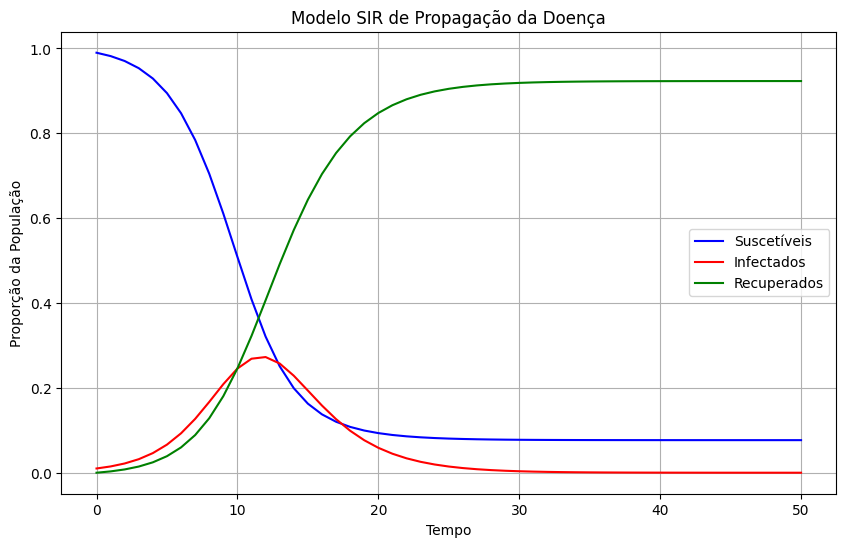

In [54]:
# Plotagem dos resultados
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Suscetíveis', color='blue')
plt.plot(t, I, label='Infectados', color='red')
plt.plot(t, R, label='Recuperados', color='green')
plt.xlabel('Tempo')
plt.ylabel('Proporção da População')
plt.title('Modelo SIR de Propagação da Doença')
plt.legend()
plt.grid()
plt.show()